In [48]:
import numpy as np
import scipy
from IPython.display import Audio
import matplotlib.pyplot as plt
SAMPLE_RATE = 44100
TIME = 1
N = TIME * SAMPLE_RATE
T = 1 / SAMPLE_RATE
def saw_ft(freq: float, amplitude: float):
    w = np.zeros((SAMPLE_RATE,), dtype='complex_')
    w[0] = 1
    for i in range(np.floor_divide(len(w), 2*freq)):
        if i != 0:
            b = -1/(i) * np.power(-1, i * freq)
            b *= amplitude
            w[i * freq] = 0+b*1j
    return w
def delta_ft(freq: float, amplitude: float, is_complex = False):
    w = np.zeros((SAMPLE_RATE,), dtype='complex_')
    w[0] = 1
    if complex:
        w[int(freq)] = (0+amplitude*1j)
    else:
        w[int(freq)] = amplitude
    return w
def sine_ft(freq: float, amplitude: float):
    return delta_ft(freq, amplitude, is_complex=False) + delta_ft(freq, amplitude, is_complex=True)
def get_audio(arr, rate = SAMPLE_RATE):
    return Audio(arr, rate = rate)
def plot(x, name, x_lower=1):
    plt.stem(np.real(x))
    plt.xlim(x_lower, SAMPLE_RATE)
    plt.xscale('log')
    plt.title("Real component of "+name)
    plt.show()
    plt.stem(np.imag(x))
    plt.xlim(x_lower, SAMPLE_RATE)
    plt.xscale('log')
    plt.title("Imaginary component of "+name)
    plt.show()

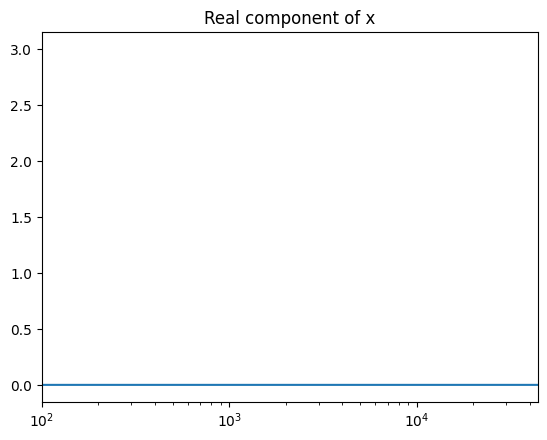

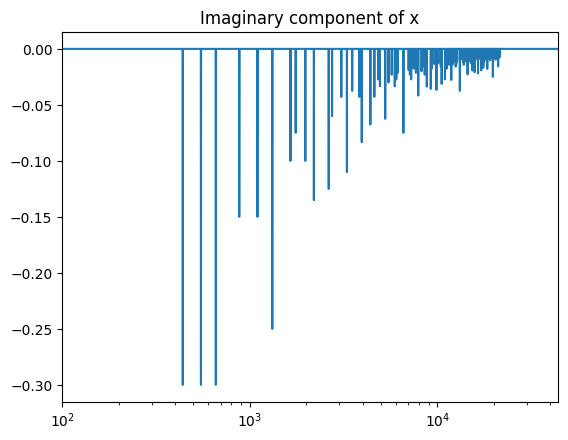

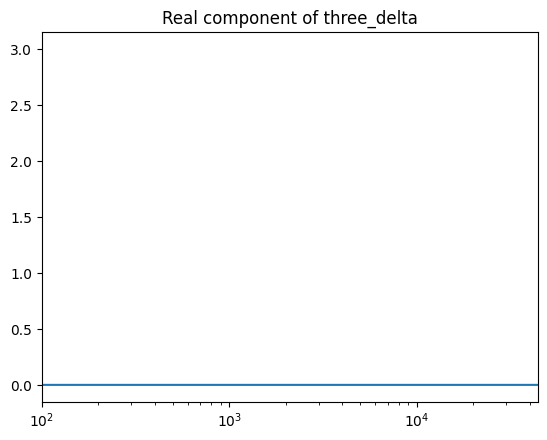

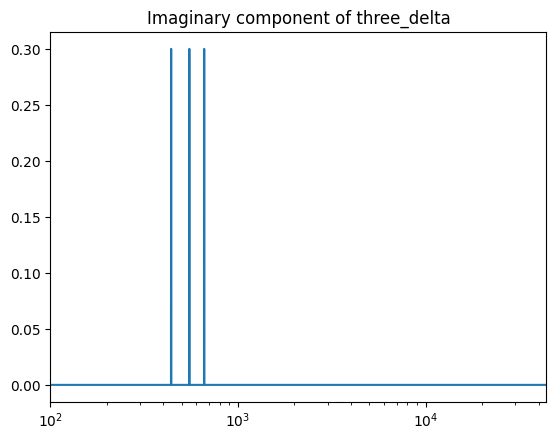

In [37]:
x = saw_ft(440, 0.3) + saw_ft(550, 0.3) + saw_ft(660, 0.3)
plot(x, "x")
three_delta = delta_ft(440, 0.3) + delta_ft(550, 0.3) + delta_ft(660, 0.3)
plot(three_delta, "three_delta")

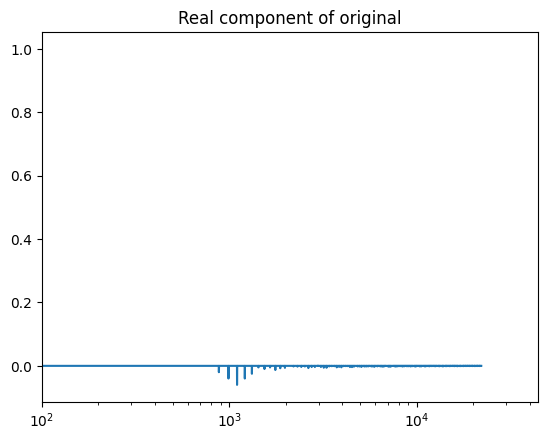

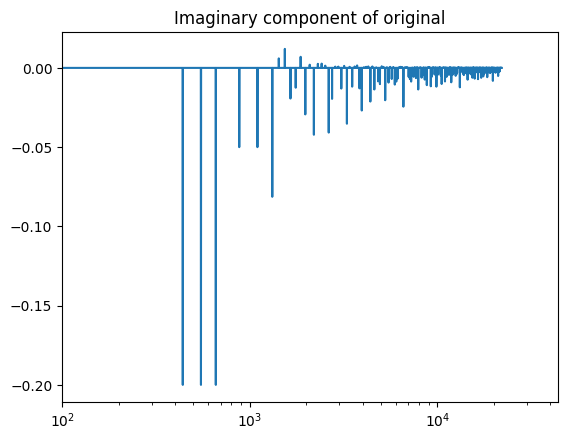

In [39]:
original = scipy.signal.deconvolve(x[:len(x)-1], three_delta[:int(len(three_delta)/2)])
plot(original[0], 'original')
get_audio(np.real(scipy.fft.ifft(original[0])), rate=int(SAMPLE_RATE/2))

In [ ]:
original_2 = scipy.fft.ifft(x) / scipy.fft.ifft(three_delta)
get_audio(scipy.fft.ifft(three_delta), rate=SAMPLE_RATE)

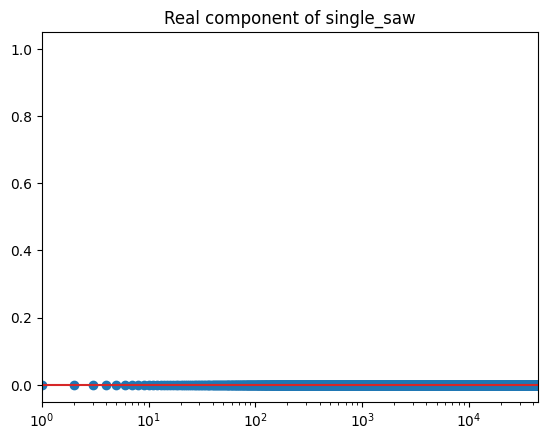

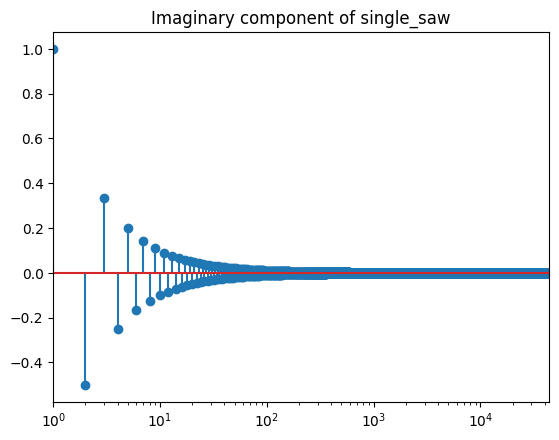

In [45]:
single_saw = saw_ft(1, 1)
plot(single_saw, "single_saw")

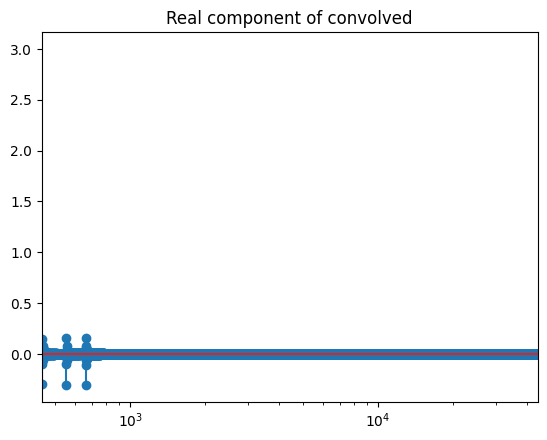

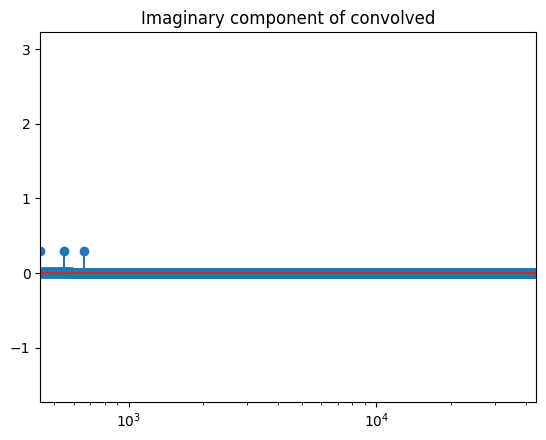

In [49]:
plot(scipy.signal.convolve(single_saw, three_delta), "convolved", x_lower=440)